# Patient Survival Prediction

In [ ]:
import os

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
# df=pd.read_csv("/content/train.csv")
df=pd.read_csv("https://raw.githubusercontent.com/WXP120hz/chatgpt/main/obesity_train.csv")

df.columns#顯示欄位


Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [ ]:
df.isnull().sum()#確認有無缺失值, 此處無

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Overweight_Level_II'),
  Text(1, 0, 'Normal_Weight'),
  Text(2, 0, 'Insufficient_Weight'),
  Text(3, 0, 'Obesity_Type_III'),
  Text(4, 0, 'Obesity_Type_II'),
  Text(5, 0, 'Overweight_Level_I'),
  Text(6, 0, 'Obesity_Type_I')])

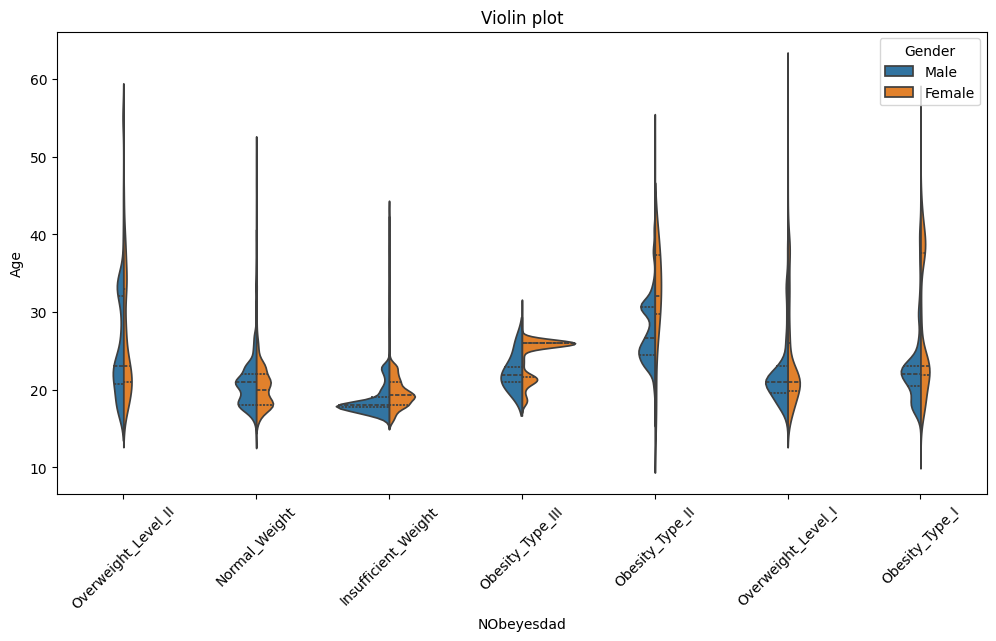

In [7]:
plt.figure(figsize = (12, 6))
sns.violinplot(data=df, x="NObeyesdad", y="Age", hue="Gender",split=True, inner="quart")
plt.title('Violin plot')
plt.xlabel('NObeyesdad')
plt.ylabel('Age')
plt.xticks(rotation=45)
# plt.legend(title='Gender')

([<matplotlib.patches.Wedge at 0x7b495b532a40>,
 [Text(-1.0959540468380162, 0.09425883098880043, 'Obesity_Type_III'),
  Text(-0.5774768615534106, -0.9362267216707838, 'Obesity_Type_II'),
  Text(0.43373933215373356, -1.0108759526978734, 'Normal_Weight'),
  Text(1.0634155150006646, -0.28133155254231856, 'Obesity_Type_I'),
  Text(0.9298588700050465, 0.5876754902775325, 'Insufficient_Weight'),
  Text(0.2653673454850133, 1.0675112046017305, 'Overweight_Level_II'),
  Text(-0.5325284557424894, 0.9625037370444437, 'Overweight_Level_I')],
 [Text(-0.5977931164570998, 0.05141390781207296, '19.5%'),
  Text(-0.314987379029133, -0.5106691209113365, '15.6%'),
  Text(0.23658509026567281, -0.5513868832897492, '14.8%'),
  Text(0.5800448263639988, -0.1534535741139919, '14.0%'),
  Text(0.5071957472754799, 0.3205502674241086, '12.2%'),
  Text(0.14474582481000722, 0.5822788388736712, '12.1%'),
  Text(-0.2904700667686305, 0.5250020383878783, '11.7%')])

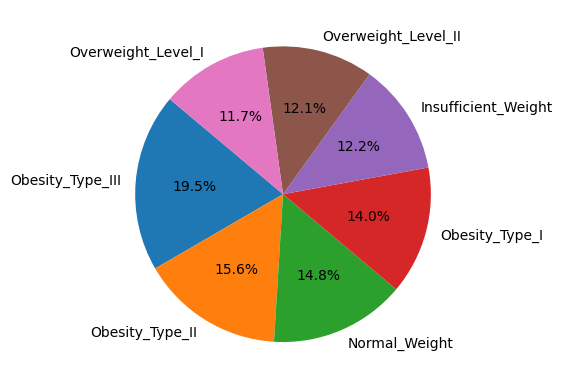

In [ ]:
# Define labels for the pie chart
labels = ['Obesity_Type_III', 'Obesity_Type_II','Normal_Weight','Obesity_Type_I','Insufficient_Weight','Overweight_Level_II','Overweight_Level_I']
sizes = [4046, 3248,3082,2910,2523,2522,2427]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

Text(0.5, 1.0, 'Distribution of Obesity Classes')

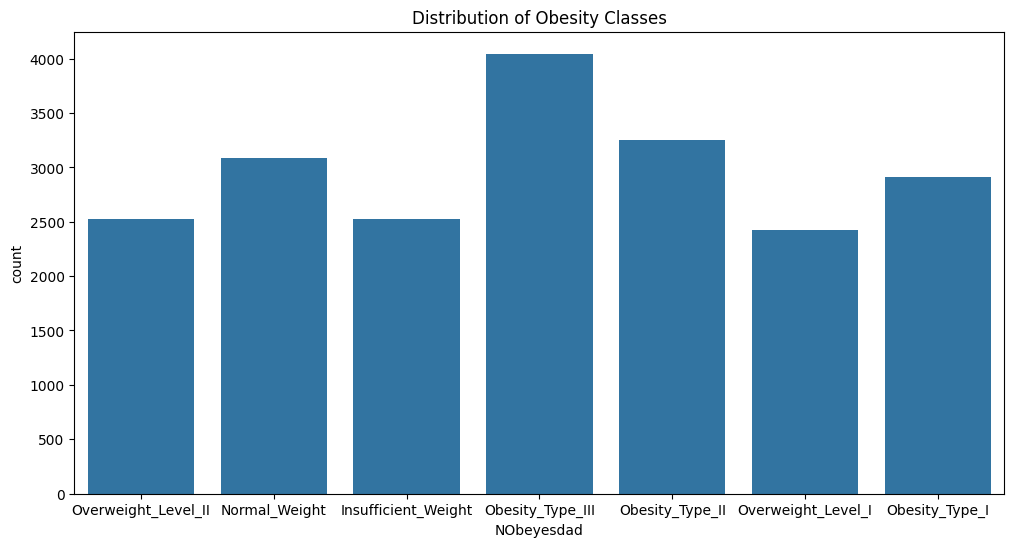

In [ ]:

plt.figure(figsize = (12, 6))
sns.countplot(x='NObeyesdad', data=df)
plt.title('Distribution of Obesity Classes')

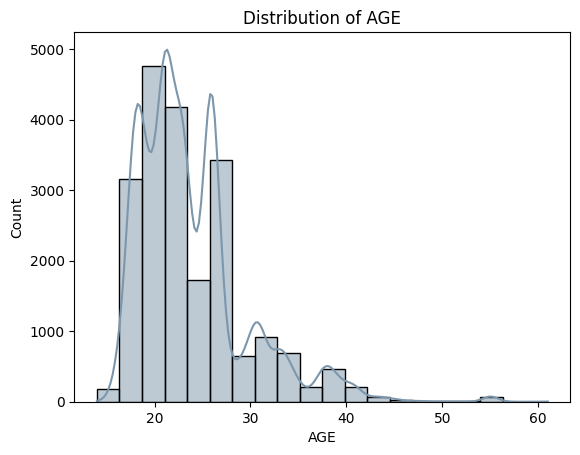

In [ ]:
sns.histplot(df['Age'], kde=True, color="#7C96AB",bins=20)

plt.xlabel("AGE")
plt.ylabel("Count")
plt.title("Distribution of AGE")
plt.show()

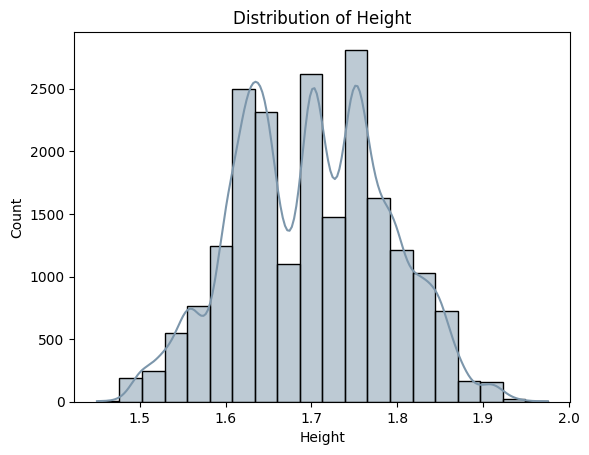

In [ ]:
sns.histplot(df['Height'], kde=True, color="#7C96AB",bins=20)

plt.xlabel("Height")
plt.ylabel("Count")
plt.title("Distribution of Height")
plt.show()

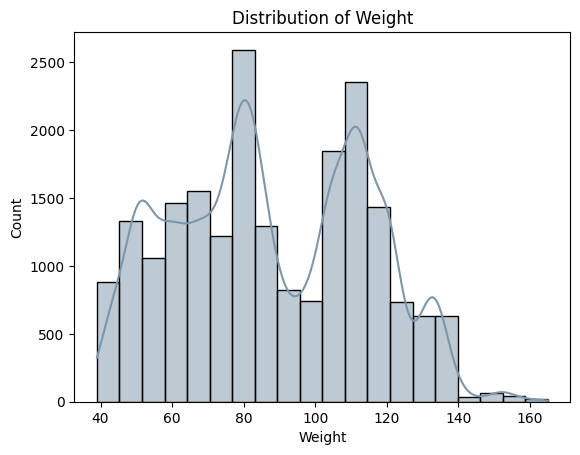

In [ ]:
sns.histplot(df['Weight'], kde=True, color="#7C96AB",bins=20)

plt.xlabel("Weight")
plt.ylabel("Count")
plt.title("Distribution of Weight")
plt.show()

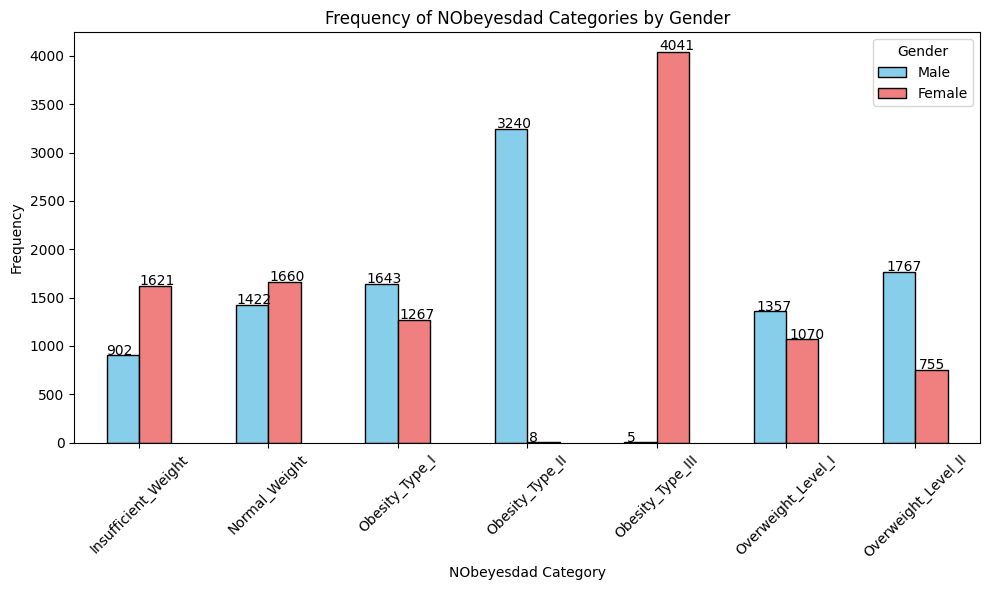

In [ ]:
male_mask = df['Gender']=='Male'
female_mask = df['Gender']=='Female'
male_df = df.loc[male_mask,['Gender','NObeyesdad']]
female_df = df.loc[female_mask,['Gender','NObeyesdad']]
male_counts = male_df['NObeyesdad'].value_counts().sort_index()
female_counts = female_df['NObeyesdad'].value_counts().sort_index()
counts_df = pd.DataFrame({
    'Male': male_counts,
    'Female': female_counts})
fig, ax = plt.subplots(figsize=(10, 6))
counts_df.plot(kind='bar', color=['skyblue', 'lightcoral'], edgecolor='black', ax=ax)

# Add data labels
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))

# Adding title and labels
plt.title('Frequency of NObeyesdad Categories by Gender')
plt.xlabel('NObeyesdad Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Gender')

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
# # Create a grid of subplots
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))  # Add a closing parenthesis here

# # Plot d1_diasbp_max in the first subplot
# axes[0, 0].hist(df[df['US_FL_MJ']==0]['WAIST'].dropna(), bins=20, color='#7C96AB')
# axes[0, 0].set_title('Distribution of WAIST for 0')
# axes[0, 0].set_xlabel('WAIST')
# axes[0, 0].set_ylabel('Count')

# # Plot d1_diasbp_min in the second subplot
# axes[0, 1].hist(df[df['US_FL_MJ']==2]['WAIST'].dropna(), bins=20, color='#F3E99F')
# axes[0, 1].set_title('Distribution of WAIST for 2')
# axes[0, 1].set_xlabel('WAIST')
# axes[0, 1].set_ylabel('Count')
# axes[1, 0].hist(df[df['US_FL_MJ']==3]['WAIST'].dropna(), bins=20, color='#7C96AB')
# axes[1, 0].set_title('Distribution of WAIST for 3')
# axes[1, 0].set_xlabel('WAIST')
# axes[1, 0].set_ylabel('Count')
# axes[1, 1].hist(df[df['US_FL_MJ']==4]['WAIST'].dropna(), bins=20, color='#F3E99F')
# axes[1, 1].set_title('Distribution of WAIST for 4')
# axes[1, 1].set_xlabel('WAIST')
# axes[1, 1].set_ylabel('Count')
# plt.tight_layout()
# plt.show()

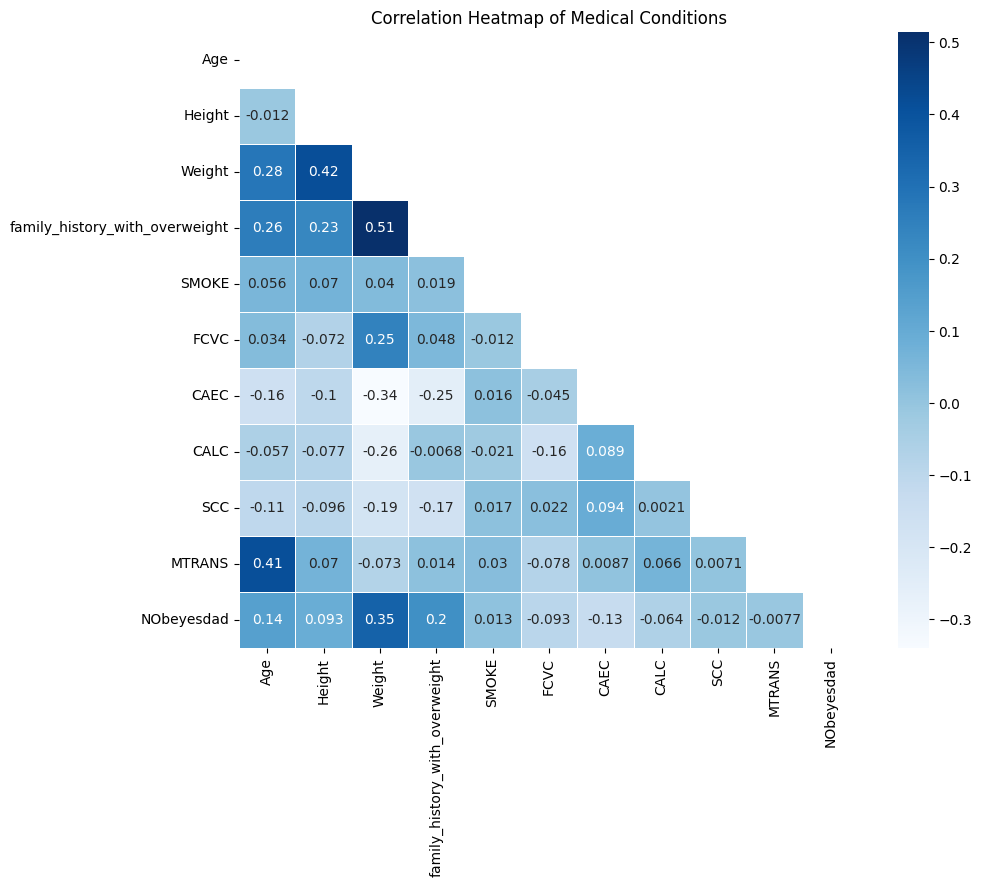

In [ ]:
df=pd.read_csv("/content/train.csv")
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['family_history_with_overweight']=df ['family_history_with_overweight'].map({'yes':1,'no':0})
df['FAVC']=df['FAVC'].map({'yes':1,'no':0})
df['SMOKE']=df['SMOKE'].map({'yes':1,'no':0})
df['SCC']=df['SCC'].map({'yes':1,'no':0})
df['NObeyesdad']=df['NObeyesdad'].map({'Overweight_Level_II':0,'Normal_Weight':1,'Insufficient_Weight':2,'Obesity_Type_III':3,'Obesity_Type_II':4
                    ,'Overweight_Level_I':5,'Obesity_Type_I':6})
df['CAEC']=df['CAEC'].map({'Sometimes':0, 'Frequently':1, 'no':2, 'Always':3})
df['CALC']=df['CALC'].map({'Sometimes':0, 'Frequently':1, 'no':2})
df['MTRANS']=df['MTRANS'].map({'Public_Transportation':0, 'Automobile':1, 'Walking':2, 'Motorbike':3,       'Bike':4})
# Select the binary columns
binary_columns = df[['Age','Height', 'Weight', 'family_history_with_overweight', 'SMOKE', 'FCVC','CAEC','CALC','SCC','MTRANS', 'NObeyesdad']]

# Calculate the correlation matrix
correlation_matrix = binary_columns.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5,mask=mask)

# Add a title
plt.title('Correlation Heatmap of Medical Conditions')

# Show the plot
plt.show()

In [ ]:
df['MTRANS'].unique()

array(['Public_Transportation', 'Automobile', 'Walking', 'Motorbike',
       'Bike'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  int64  
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  int64  
 6   FAVC                            20758 non-null  int64  
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  int64  
 10  SMOKE                           20758 non-null  int64  
 11  CH2O                            20758 non-null  float64
 12  SCC                             

# Machine Learning Models

In [ ]:
# Import necessary libraries
